# Part 1

* item 

* item 2

In [3]:
pip install ipywidgets==8.1.5


Note: you may need to restart the kernel to use updated packages.


In [4]:
from ipywidgets import IntSlider
IntSlider()


IntSlider(value=0)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, fixed
from pathlib import Path

IMG_PATH = Path('/Users/mollymyers/ComputerVision/feature_detection/images/example.jpg')

def imread_gray(path):
    img = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f'Could not read image: {path}')
    return img

def show(img, title=None):
    plt.figure(figsize=(8,5))
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

img = imread_gray(IMG_PATH)


Default SIFT params:
  nfeatures        = 0
  nOctaveLayers    = 3
  contrastThreshold= 0.04
  edgeThreshold    = 10.0
  sigma            = 1.6
Detected 384 keypoints


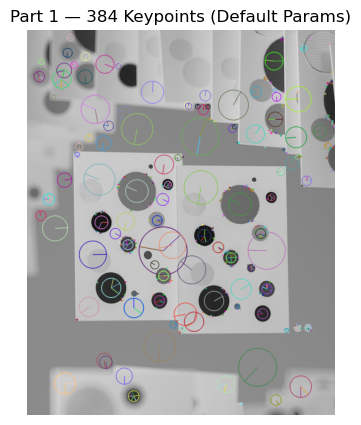

In [6]:
sift = cv2.SIFT_create()
print('Default SIFT params:')
print('  nfeatures        =', sift.getNFeatures())
print('  nOctaveLayers    =', sift.getNOctaveLayers())
print('  contrastThreshold=', sift.getContrastThreshold())
print('  edgeThreshold    =', sift.getEdgeThreshold())
print('  sigma            =', sift.getSigma())

kps = sift.detect(img, None)
print(f"Detected {len(kps)} keypoints")

out = cv2.drawKeypoints(img, kps, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
show(out, title=f'Part 1 — {len(kps)} Keypoints (Default Params)')


In [ ]:
def preview_keypoints(kps, label="Keypoint attribute preview (first 5):"):
    if kps is None:
        print("kps is None — run the detection cell.")
        return
    if len(kps) == 0:
        print("No keypoints to preview — lower contrastThreshold.")
        return

    print(label)
    for i, kp in enumerate(kps[:5]):
        x, y = kp.pt
        ang = kp.angle if (kp.angle is not None and kp.angle >= 0) else float('nan')
        print(
            f"#{i}: pt=({x:.1f}, {y:.1f}), "
            f"size={kp.size:.2f}, angle={ang:.1f}, "
            f"response={kp.response:.4f}, octave={kp.octave}, class_id={kp.class_id}"
        )

preview_keypoints(kps, "Default SIFT — first 5:")


Default SIFT — first 5:
#0: pt=(25.1, 96.5), size=22.16, angle=29.4, response=0.0189, octave=14615042, class_id=-1
#1: pt=(25.1, 96.5), size=22.16, angle=96.8, response=0.0189, octave=14615042, class_id=-1
#2: pt=(25.1, 96.5), size=22.16, angle=247.1, response=0.0189, octave=14615042, class_id=-1
#3: pt=(28.5, 385.5), size=21.00, angle=256.6, response=0.0135, octave=10748418, class_id=-1
#4: pt=(29.5, 65.2), size=12.46, angle=170.6, response=0.0172, octave=6423297, class_id=-1


# Part 2

In [8]:
def run_sift(image, nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma):
    detector = cv2.SIFT_create(
        nfeatures=int(nfeatures),
        nOctaveLayers=int(nOctaveLayers),
        contrastThreshold=float(contrastThreshold),
        edgeThreshold=float(edgeThreshold),
        sigma=float(sigma),
    )
    kps = detector.detect(image, None)
    vis = cv2.drawKeypoints(image, kps, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return detector, kps, vis

def demo_tuning(image, nfeatures=0, nOctaveLayers=3, contrastThreshold=0.04, edgeThreshold=10.0, sigma=1.6):
    det, kps2, vis = run_sift(image, nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma)
    print(f"Paramaters → nfeatures={nfeatures}, nOctaveLayers={nOctaveLayers}, "
          f"contrastThreshold={contrastThreshold:.4f}, edgeThreshold={edgeThreshold:.2f}, sigma={sigma:.2f}")
    print(f"Detected keypoints: {len(kps2)}")
    show(vis, title=f'Part 2 — {len(kps2)} keypoints (tuned)')

interact(
    demo_tuning,
    image=fixed(img),
    nfeatures=IntSlider(value=0, min=0, max=5000, step=50, description='nfeatures'),
    nOctaveLayers=IntSlider(value=3, min=1, max=8, step=1, description='nOctLayers'),
    contrastThreshold=FloatSlider(value=0.04, min=0.001, max=0.2, step=0.001, readout_format='.3f', description='contrastThr'),
    edgeThreshold=FloatSlider(value=10.0, min=1.0, max=30.0, step=0.5, description='edgeThr'),
    sigma=FloatSlider(value=1.6, min=0.6, max=4.0, step=0.1, description='sigma'),
);


interactive(children=(IntSlider(value=0, description='nfeatures', max=5000, step=50), IntSlider(value=3, descr…

# Part 3

Descriptors shape: (494, 128)
Example descriptor rows (first 3):
 [[  8.  16.   2.   8.  25.   7.   0.   0.  32.  26.  18.  53. 122. 122.
    8.   8. 122.  28.   7.   6.  16.  38.  70.  64.  18.   1.   5.  25.
   89.  90.  57.  52.   1.   2.   3.  13.   4.   2.   0.   0.  18.  10.
   12. 122.  90.  65.  12.  11. 122.  45.  10.  22.  13.  17.  12.  49.
   53.  11.  21.   3.  13.  69.  26.  11.   0.   0.   0.   2.   1.   0.
    0.   0.   5.   2.   1.  23.  27.  30.  83.  37.  76.   8.  24.  44.
   48.  19.  75. 122.  20.  18. 122. 115.  33.  16.   6.  11.   0.   0.
    0.   0.   0.   0.   0.   0.   1.   1.   0.   0.   0.   0.   8.   8.
    5.   4.   2.  12.  59.  66.  19.  14.   5.   3.  32.  38.  46. 122.
  122.  58.]
 [109.  54.  27.   5.   3.  25.  31.  61.  50.  64.  52.   0.   0.   7.
   65.  39.   6.  26.  27.  53.  86.   3.  12.  28.  47.  55.  53. 108.
  113.  15.  12.  27.  21.  50.  74.  29.  31.  64. 113.  42.  23. 113.
  113.  11.  25.  42.  42.  27.  86. 113.  65.  15.  58. 

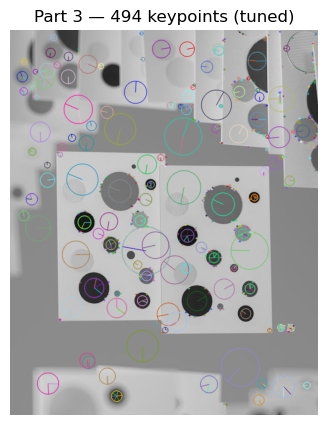

In [ ]:
chosen = dict(nfeatures=0, nOctaveLayers=3, contrastThreshold=0.02, edgeThreshold=10.0, sigma=1.6)
sift_tuned = cv2.SIFT_create(**chosen)
kps_tuned = sift_tuned.detect(img, None)
kps_tuned, desc = sift_tuned.compute(img, kps_tuned)

print('Descriptors Shape:', None if desc is None else desc.shape)
if desc is not None:
    np.set_printoptions(precision=1, suppress=True)
    print('Example Descriptor Rows (first 3):\n', desc[:3])

out_tuned = cv2.drawKeypoints(img, kps_tuned, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
show(out_tuned, title=f'Part 3 — {len(kps_tuned)} Keypoints (tuned)')


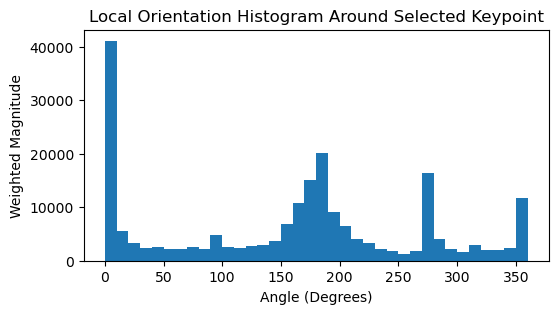

In [ ]:
def visualize_orientation(image, kp, patch_scale=3):
    x, y = int(round(kp.pt[0])), int(round(kp.pt[1]))
    r = int(max(8, kp.size * patch_scale))
    x0, x1 = max(0, x-r), min(image.shape[1], x+r)
    y0, y1 = max(0, y-r), min(image.shape[0], y+r)
    patch = image[y0:y1, x0:x1]
    if patch.size == 0:
        print('Empty patch around keypoint; try another.')
        return
    gx = cv2.Sobel(patch, cv2.CV_32F, 1, 0, ksize=3)
    gy = cv2.Sobel(patch, cv2.CV_32F, 0, 1, ksize=3)
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    hist, bins = np.histogram(ang, bins=36, range=(0,360), weights=mag)
    plt.figure(figsize=(6,3))
    centers = (bins[:-1] + bins[1:]) / 2.0
    plt.bar(centers, hist, width=10)
    plt.title('Local Orientation Histogram Around Selected Keypoint')
    plt.xlabel('Angle (Degrees)')
    plt.ylabel('Weighted Magnitude')
    plt.show()

if kps_tuned:
    visualize_orientation(img, kps_tuned[0])
else:
    print('No tuned keypoints — lower contrastThreshold in Part 2 and re-try.')


image1: (800, 640) kps: 384 desc: (384, 128)
image2: (800, 640) kps: 316 desc: (316, 128)


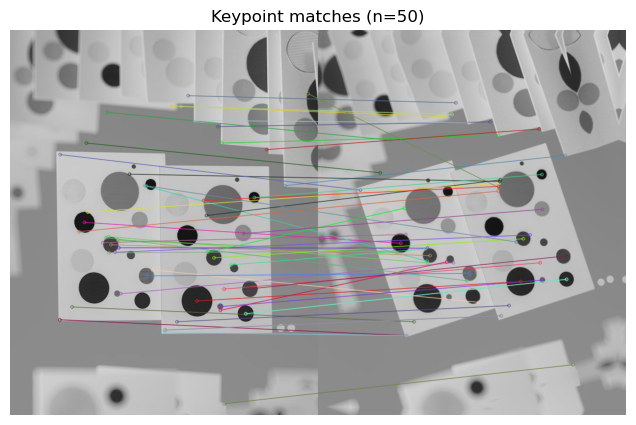

In [13]:
image1 = imread_gray(IMG_PATH)

(h, w) = image1.shape[:2]
center = (w//2, h//2)

M = cv2.getRotationMatrix2D(center, angle=18, scale=0.95)
rot_scaled = cv2.warpAffine(image1, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

src = np.float32([[0,0], [w-1,0], [0,h-1]])
dst = np.float32([[10,5], [w-15,12], [6,h-18]])
A = cv2.getAffineTransform(src, dst)
image2 = cv2.warpAffine(rot_scaled, A, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

cv2.imwrite('example-image-transformed.jpg', image2)

sift = cv2.SIFT_create()
keypoints,  descriptors  = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

print("image1:", image1.shape, "kps:", len(keypoints),  "desc:", None if descriptors  is None else descriptors.shape)
print("image2:", image2.shape, "kps:", len(keypoints2), "desc:", None if descriptors2 is None else descriptors2.shape)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors, descriptors2)
matches = sorted(matches, key=lambda m: m.distance)[:50]

matched_img = cv2.drawMatches(
    image1, keypoints,
    image2, keypoints2,
    matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)
show(matched_img, title=f"Keypoint matches (n={len(matches)})")
